# Pymaceuticals Inc.
---

### Analysis

-  Looking at the bar graph, we can note that Capomulin was given to the most mice. On the other side, Propriva was given to the fewest number of mice. Another interesting observation is the split between female and male mice treated was 51/49 in favor of males.
-  We can determine that as the mice weights increased, the average tumor size also increased. This is due to the correlation coefficient value of 0.84 indicating a strong positive correlation.
-  Taking into account the regression analysis, we can gain an understanding of just how much the average tumor volume will vary when the weight of the mice changes. Having an R-squared value of 0.709 tells us that roughly 70% of the variability in Average Tumor Volume can be explained by the weight of the mouse.
-  When comparing Capomulin, Ramicane, Infubinol, and Ceftamin; We can observe that the Average Tumor Volume decreased the most when mice were treated using the Capomulin & Ramicane Regimens.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [81]:
# Checking the number of mice.
number_mice = len(merged_df["Mouse ID"].unique())
number_mice

249

In [83]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe_mouse = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dupe_mouse_id = dupe_mouse['Mouse ID'].unique()
dupe_mouse_id

array(['g989'], dtype=object)

In [85]:
# Optional: Get all the data for the duplicate mouse ID.
dupe_mouse_df = merged_df[merged_df['Mouse ID'].isin(dupe_mouse_id)]
dupe_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
#cleaned_df.head()
clean_df = merged_df[merged_df['Mouse ID'] != "g989"]
clean_df['Mouse ID'].value_counts()

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
d133     1
b447     1
u153     1
v199     1
t573     1
Name: count, Length: 248, dtype: int64

In [93]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean = clean_df['Mouse ID'].nunique()
print(f"Number of unique mice IDs in the clean DataFrame: {num_unique_mice_clean}")

Number of unique mice IDs in the clean DataFrame: 248


## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
std_err = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": std_err}) 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

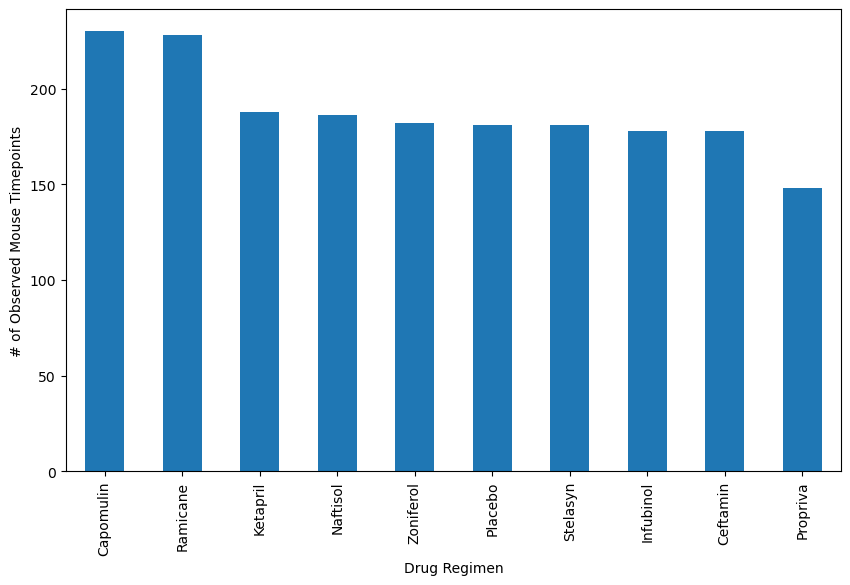

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_row_data = clean_df["Drug Regimen"].value_counts()

bar_plot = mouse_row_data.plot(kind='bar', figsize=(10,6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

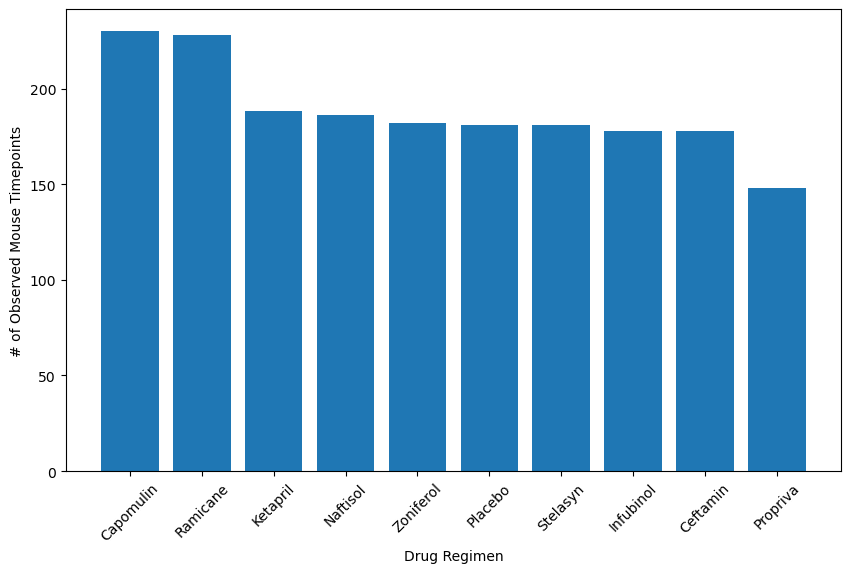

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(mouse_row_data.index, mouse_row_data.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

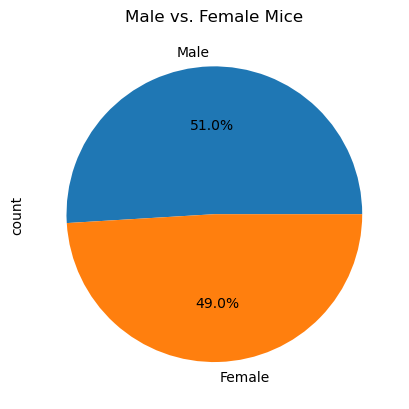

In [105]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender = clean_df["Sex"].value_counts()
plt.title("Male vs. Female Mice")
unique_gender.plot.pie(autopct = "%1.1f%%")
plt.show()
          

# Make the pie chart


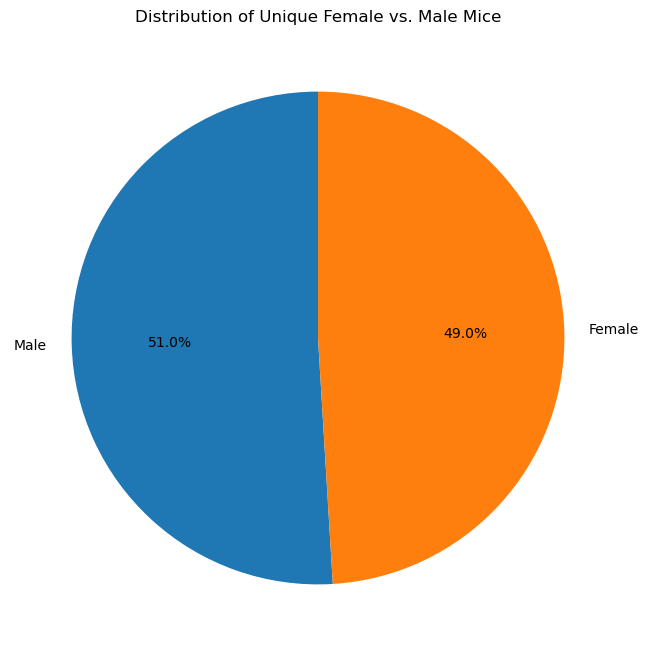

In [107]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
plt.figure(figsize=(8,8))
plt.pie(unique_gender, labels=unique_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unique Female vs. Male Mice')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_df = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]
print(final_tumor_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [129]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#for treatment in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset

    # Determine outliers using upper and lower bounds

for treatment in treatments:
    
    treatment_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    tumor_vol_data.append(treatment_data)
    
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data > upper_bound) | (treatment_data < lower_bound)]

    if len(outliers) > 0:
        print(f"Potential outliers for {treatment}: {outliers}")



Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


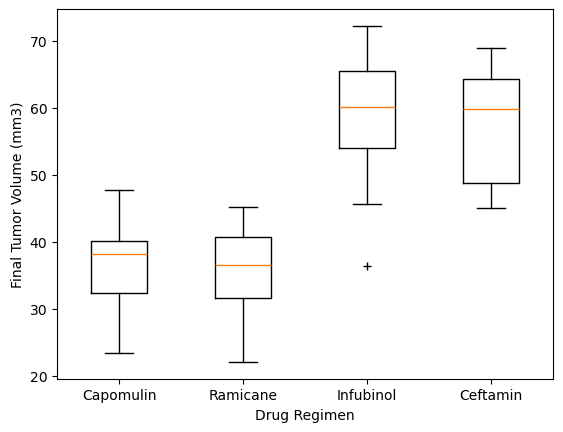

In [141]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
bp = plt.boxplot(tumor_vol_data, labels = treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.setp(bp['fliers'], color='red', marker='+')
plt.show()

## Line and Scatter Plots

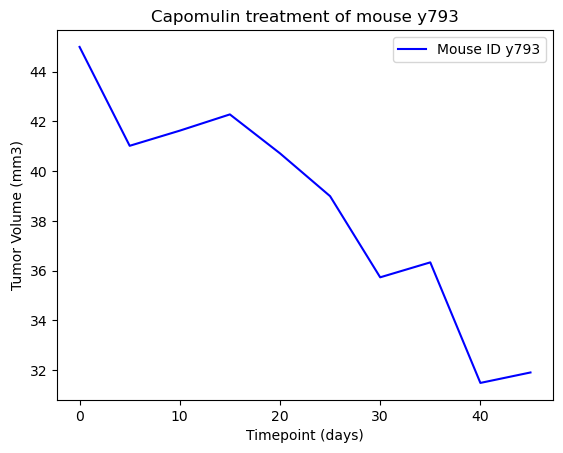

In [163]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseY793 = clean_df.loc[clean_df['Mouse ID'] == 'y793']

x_value = mouseY793["Timepoint"]
y_value = mouseY793["Tumor Volume (mm3)"]

plt.plot(x_value, y_value, color='blue', label='Mouse ID y793')
plt.legend(loc='best')
plt.title('Capomulin treatment of mouse y793')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

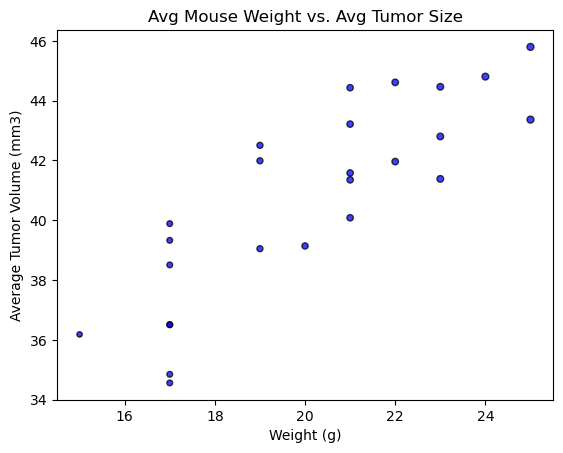

In [155]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
avg_mouse_data = capomulin_df.groupby('Mouse ID')

mouse_wt = avg_mouse_data["Weight (g)"].mean()
mouse_tvol = avg_mouse_data["Tumor Volume (mm3)"].mean()

avg_mouse_df = pd.DataFrame({"Weight (g)": mouse_wt,
                             "Tumor Volume (mm3)": mouse_tvol})

x_values = avg_mouse_df["Weight (g)"]
y_values = avg_mouse_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black',
            s=x_values, alpha=0.75)
plt.title('Avg Mouse Weight vs. Avg Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

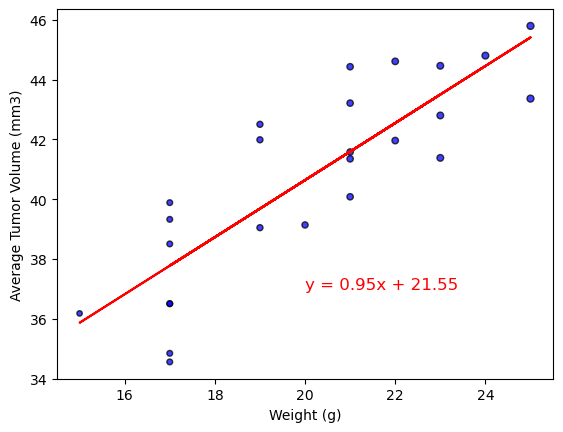

The r-squared is: 0.709
The correlation coefficient is 0.84


In [161]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black',
            s=x_values, alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,37), fontsize=12,color='red')
plt.show()

print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation coefficient is {round(st.pearsonr(x_values,y_values)[0],2)}")